In [2]:
import sys
import matplotlib
import numpy as np
import glob
from matplotlib import pyplot as plt
import os
import datetime
from collections import Counter 
import cv2
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D,BatchNormalization,LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
#from tensorflow.python.keras.callbacks import TensorBoard
device_name = tensorflow.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))


from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

tensorflow.__version__

Found GPU at: /device:GPU:0


'2.1.0'

In [3]:
# just to make sure!
tensorflow.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
batch_size = 16   #/32/128/64/256/512
epochs = 30 
IMG_HEIGHT = 150
IMG_WIDTH = 150
model= Sequential([
    Conv2D(32, 3, padding='same', activation=LeakyReLU(alpha=0.01), input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    #BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, 3, padding='same', activation=LeakyReLU(alpha=0.01)),
    #BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    #Dropout(rate=0.2),

    Conv2D(128, 3, padding='same', activation=LeakyReLU(alpha=0.01)),
    #BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    #Dropout(rate=0.2),
    
    Flatten(),
    Dropout(rate=0.2),
    Dense(512, activation=LeakyReLU(alpha=0.01)),
    Dense(1)
])

# #model 6 lower? 
# model= Sequential([
#     Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
#     #BatchNormalization(),
#     MaxPooling2D(pool_size=(2, 2)),
    

#     Conv2D(32, 3, padding='same', activation='relu'),
#     MaxPooling2D(pool_size=(2, 2)),
#     Dropout(rate=0.2),

#     Conv2D(64, 3, padding='same', activation='relu'),
#     MaxPooling2D(pool_size=(2, 2)),
#     Dropout(rate=0.2),
    
#     Flatten(),
#     Dense(512, activation='relu'),
#     Dense(1)
# ])

model.compile(optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False),
              loss=tensorflow.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])





In [5]:
## model.load_weights(latest)
test_image_generator = ImageDataGenerator(rescale=1./255)
test_data_gen = test_image_generator.flow_from_directory(batch_size=30,
                                                              directory="D:/imageData/test",
                                                              #shuffle=True,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary',
                                                              color_mode="rgb")
validation_image_generator = ImageDataGenerator(rescale=1./255) 
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory="D:/imageData/validation",
                                                              #shuffle=True,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary',
                                                              color_mode="rgb")


test_data_gen.class_indices
# Re-evaluate the model

# loss,acc = model.evaluate(val_data_gen, verbose=2)
# print("Restored model, accuracy: {:5.2f}%".format(100*acc))


print("total number of fist test image is:{}".format(len(os.listdir("D:/imageData/test/fist/"))))
print("total number of palm test image is:{}".format(len(os.listdir("D:/imageData/test/palm/"))))



# set the checkpoint 

checkpoint_path = "D:/model_checkpoints/training_8_LeakyRelu/v2KAKE{epoch:02d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
latest = tensorflow.train.latest_checkpoint(checkpoint_dir)
print(latest)

model.load_weights(latest)
model.summary()

# a,b=model.evaluate(val_data_gen)
# print("\n lost:{}\n accuracy:{}".format(a,b))

# a,b=model.evaluate(test_data_gen)
# print("\n lost:{}\n accuracy:{}".format(a,b))

C:\Users\ddemo\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras_preprocessing\image\utils.py:173: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


Found 96 images belonging to 2 classes.
Found 1004 images belonging to 2 classes.
total number of fist test image is:50
total number of palm test image is:50
D:/model_checkpoints/training_8_LeakyRelu\v2KAKE45.ckpt
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 128)       73856     
________________________________________

In [6]:
imgdir = glob.glob("D:/imageData/paper/c1/*")
np.random.shuffle(imgdir)
print(imgdir[:10])
imgdir = imgdir[:50]

['D:/imageData/paper/c1\\IMG_20170315_105905.jpg', 'D:/imageData/paper/c1\\WP_20170402_13_06_29_Pro.jpg', 'D:/imageData/paper/c1\\AV_IMG_0372.jpg', 'D:/imageData/paper/c1\\2017-03-30 07.33.19.jpg', 'D:/imageData/paper/c1\\IMG_20170315_110002.jpg', 'D:/imageData/paper/c1\\IMG_5783.jpg', 'D:/imageData/paper/c1\\20170410_164342.jpg', 'D:/imageData/paper/c1\\20170410_152037.jpg', 'D:/imageData/paper/c1\\20170410_151719.jpg', 'D:/imageData/paper/c1\\IMG_20170315_105903.jpg']


In [20]:
imgdir = glob.glob("D:/imageData/validation/palm_val/*")
np.random.shuffle(imgdir)
#imgdir = [imgdir[:50]]
imgdir = imgdir[:50]
print(imgdir)


#imgdir.append(glob.glob("D:/imageData/test/fist/*")[25:])

# flattened_imgdir = []
# for x in imgdir:
#     for y in x:
#         flattened_imgdir.append(y)
# print(flattened_imgdir)
# print(len(flattened_imgdir))


#os.listdir("D:/imageData/test/palm/")[0]

['D:/imageData/validation/palm_val\\S1-P180-F-25-2.jpg', 'D:/imageData/validation/palm_val\\fsharePalm_219.JPG', 'D:/imageData/validation/palm_val\\fsharePalm_75.JPG', 'D:/imageData/validation/palm_val\\palmv2_219.JPG', 'D:/imageData/validation/palm_val\\S3-P178-F-18-5.jpg', 'D:/imageData/validation/palm_val\\S1-P67-M-13-1.jpg', 'D:/imageData/validation/palm_val\\palm478.JPG', 'D:/imageData/validation/palm_val\\KHpalmv2_360.JPG', 'D:/imageData/validation/palm_val\\S1-P134-F-23- (4).jpg', 'D:/imageData/validation/palm_val\\KHpalmv2_143.JPG', 'D:/imageData/validation/palm_val\\S1-P167-M-16-3.jpg', 'D:/imageData/validation/palm_val\\fsharePalm_265.JPG', 'D:/imageData/validation/palm_val\\S1-P88-M-17-4.jpg', 'D:/imageData/validation/palm_val\\S1-P130-M-28- (1).jpg', 'D:/imageData/validation/palm_val\\S2-P153-M-17-2.jpg', 'D:/imageData/validation/palm_val\\palm58.JPG', 'D:/imageData/validation/palm_val\\S2-P35-F-36-5.jpg', 'D:/imageData/validation/palm_val\\palm163.JPG', 'D:/imageData/valid

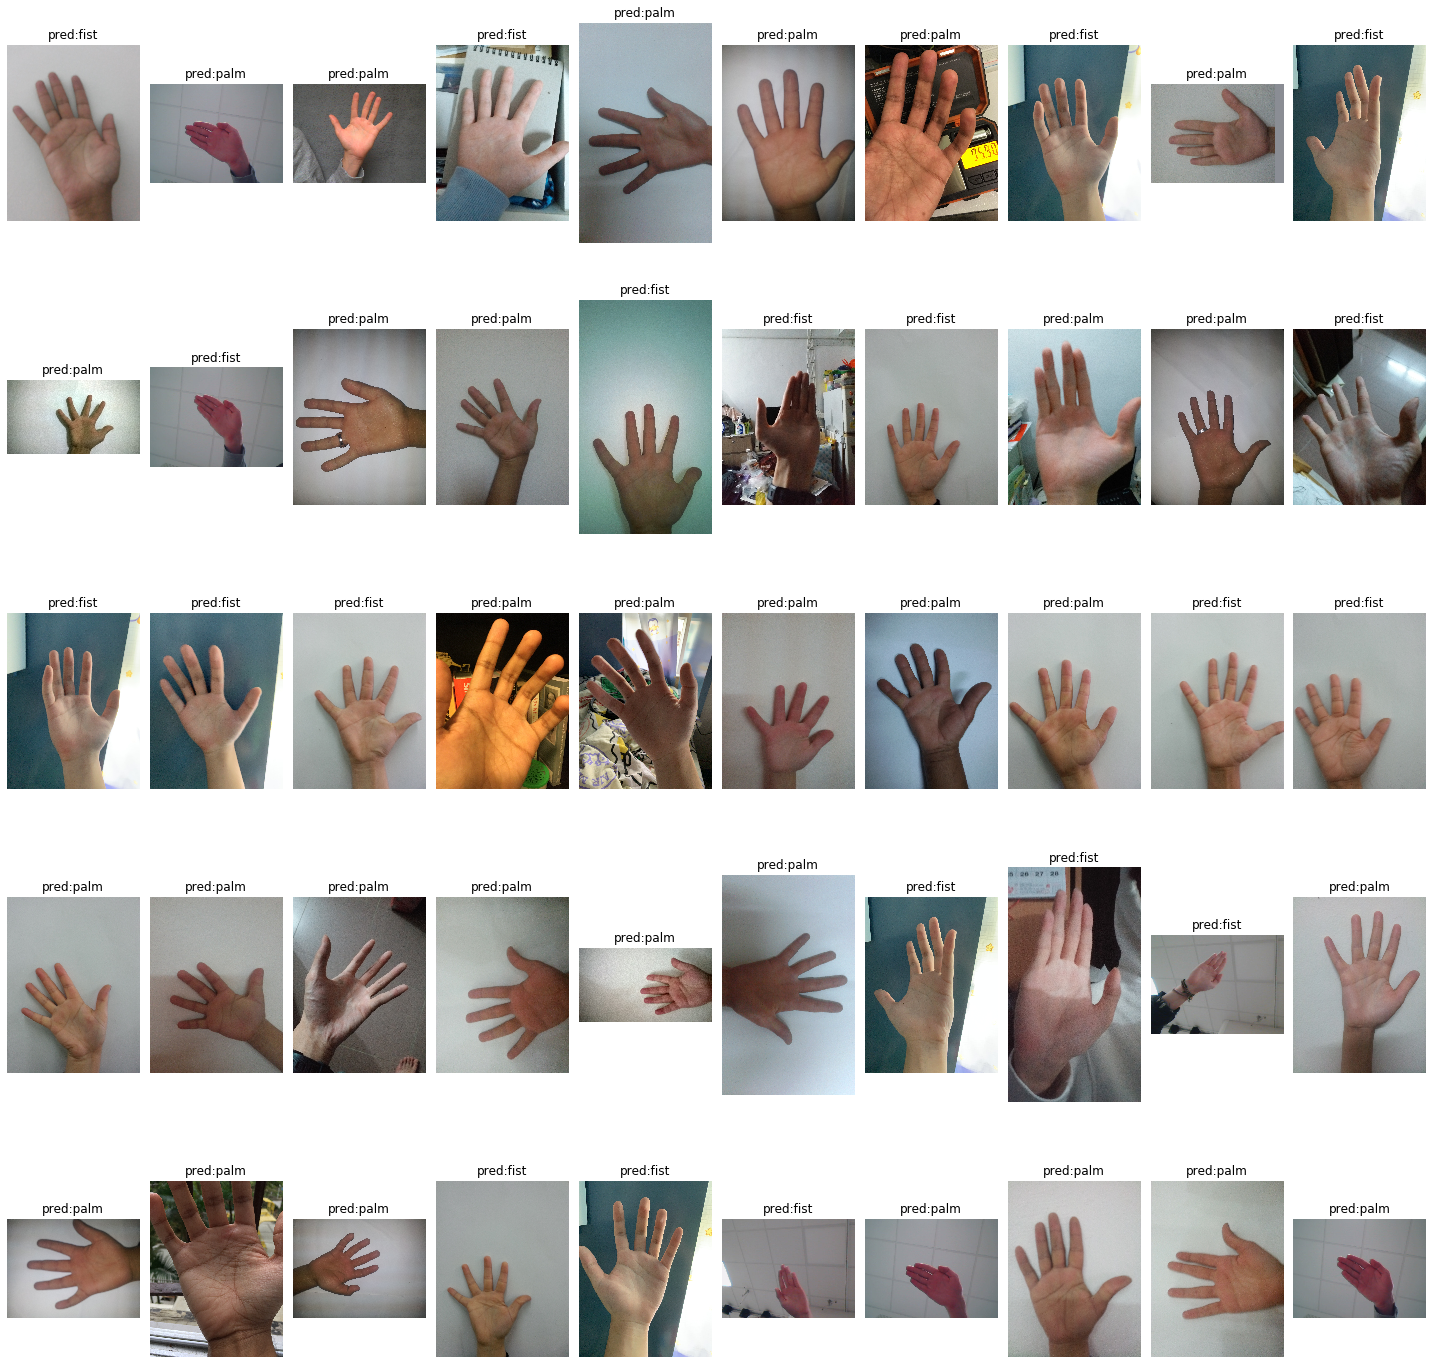

number of 1 :30
number of 0 :20


In [21]:
sum1 = 0
def makePrediction (img):
    img = cv2.resize(img,(150,150))
    img = np.reshape(img,[1,150,150,3])
    classes = model.predict_classes(img)
    if classes==0:
        return("fist")
    else:
        if classes==1:
            global sum1
            sum1 += 1
            return("palm")
        
   

fig=plt.figure(figsize=(20, 20))
columns = 10
rows = 5
ax = []

for i in range(columns*rows):
    #img = cv2.imread(glob.glob("D:/imageData/test/palm/*")[i])
    img = cv2.imread(imgdir[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # create subplot and append to ax
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title("pred:"+makePrediction(img))  # set title
    plt.imshow(img)
    plt.axis('off')

plt.tight_layout()   
#plt.savefig('C:/Users/ddemo/Desktop/training_7__palm_result.jpg')
plt.show()

print("number of 1 :{}".format(sum1))
print("number of 0 :{}".format(50-sum1))

[[0]]


'fist'

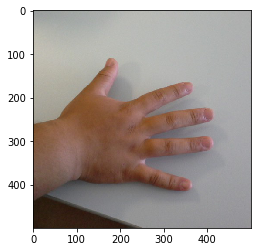

In [19]:
#print(glob.glob("D:/imageData/test/palm/*")[0])

# imageName="20140716_230806.jpg"

# img = cv2.imread(os.path.join("D:/imageData/test/palm/",imageName))
# #img = cv2.imread(os.path.join("D:/imageData/valBpalm/",imageName))

img =  cv2.imread(glob.glob("D:/imageData/test/palm/*")[2])

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

img = cv2.resize(img,(150,150))

img = np.reshape(img,[1,150,150,3])

classes = model.predict_classes(img)

print(classes)

def resultCov(classes):
    if classes==0:
        return("fist")
    else:
        if classes==1:
            return("palm")


resultCov(classes)





In [30]:
#Confution Matrix and Classification Report
gen =val_data_gen
Y_pred = model.predict_generator(gen)
y_pred = Y_pred>0.5
print('Confusion Matrix')
cm = confusion_matrix(gen.classes, y_pred)
print(cm)
print('Classification Report')
target_names = ['fist', 'palm']
print(classification_report(gen.classes, y_pred, target_names=target_names))


Confusion Matrix
[[263 238]
 [276 227]]
Classification Report
              precision    recall  f1-score   support

        fist       0.49      0.52      0.51       501
        palm       0.49      0.45      0.47       503

    accuracy                           0.49      1004
   macro avg       0.49      0.49      0.49      1004
weighted avg       0.49      0.49      0.49      1004



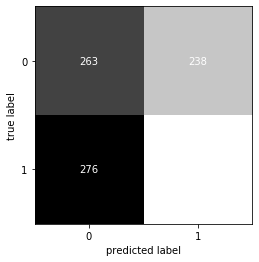

In [31]:

fig, ax = plot_confusion_matrix(conf_mat=cm,cmap=matplotlib.pyplot.cm.binary)
plt.show()

In [28]:
#Confution Matrix and Classification Report
gen =test_data_gen
Y_pred = model.predict_generator(gen)
print(Y_pred)

y_pred = Y_pred>0.5
print('Confusion Matrix')
cm = confusion_matrix(gen.classes, y_pred)
print(cm)
print('Classification Report')
target_names = ['fist', 'palm']
print(classification_report(gen.classes, y_pred, target_names=target_names))

Instructions for updating:
Please use Model.predict, which supports generators.
[[ 0.24997354]
 [ 4.907056  ]
 [11.140298  ]
 [-3.6731393 ]
 [-2.3426366 ]
 [-8.404849  ]
 [-2.1567235 ]
 [-3.6057847 ]
 [ 2.3009343 ]
 [-1.8881449 ]
 [ 1.3402069 ]
 [-3.9673843 ]
 [-8.91723   ]
 [ 1.2291881 ]
 [15.69439   ]
 [ 5.8468947 ]
 [13.725053  ]
 [-3.5513601 ]
 [-3.5235896 ]
 [-2.0700092 ]
 [-5.5389633 ]
 [ 6.5398097 ]
 [ 0.28172427]
 [-4.500578  ]
 [ 1.3759118 ]
 [-2.2650197 ]
 [ 0.72522867]
 [ 3.121358  ]
 [ 0.1765553 ]
 [ 2.014863  ]
 [ 2.2619243 ]
 [-2.8598561 ]
 [ 0.1960696 ]
 [-0.9387456 ]
 [ 3.2359688 ]
 [ 3.9611635 ]
 [-3.0084252 ]
 [-0.18254808]
 [-4.9706655 ]
 [-3.2475948 ]
 [ 7.413719  ]
 [ 2.4923904 ]
 [-2.3970637 ]
 [-3.987257  ]
 [-0.23945633]
 [ 3.728706  ]
 [-2.1996284 ]
 [ 8.975236  ]
 [-4.958061  ]
 [-2.9446812 ]
 [-0.8314854 ]
 [ 4.0766125 ]
 [-4.1846213 ]
 [-1.4509652 ]
 [-1.6114    ]
 [ 2.6065297 ]
 [ 0.38711944]
 [ 8.598773  ]
 [ 0.81172884]
 [-3.6835399 ]
 [-2.3921108 ]
 [ 9.

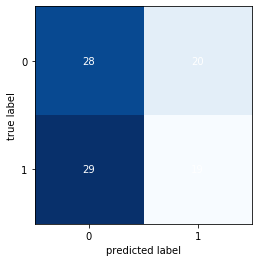

In [30]:
fig, ax = plot_confusion_matrix(conf_mat=cm,cmap=matplotlib.pyplot.cm.binary)
plt.show()
